In [1]:
import pandas as pd
import numpy as np

In [2]:
tweets_df = pd.read_csv('tweets_table-4.csv')

In [3]:
tweets_df.shape

(195086, 3)

In [4]:
tweets_df.columns

Index(['keyword', 'date', 'tweets'], dtype='object')

In [5]:
tweets_new_1 = tweets_df.drop_duplicates(['tweets'])

In [6]:
tweets_new_1.shape

(11688, 3)

In [7]:
tweets_new_1.columns

Index(['keyword', 'date', 'tweets'], dtype='object')

In [8]:
tweets_new_1['tweets'].iloc[15]

'rt inthematrixxx video spacex destroy 200m facebook technologyspacex explos deal big blow facebook destroy 200 mil'

In [9]:
tweets_new_1 = tweets_new_1.reset_index(level=0)

In [10]:
tweets_new_1.drop('index',axis=1)


array(['deletefacebook', '#deletefacebook', 'facebook', 'mark zuckerberg',
       'cambridge analytica', 'aleksandr kogan'], dtype=object)

In [89]:
unique_keywords=tweets_new_1.keyword.unique()
#Unique Keywords:
unique_keywords

array(['deletefacebook', '#deletefacebook', 'facebook', 'mark zuckerberg',
       'cambridge analytica', 'aleksandr kogan'], dtype=object)

In [11]:
frequent_words = tweets_new_1.tweets.str.split(expand=True).stack().value_counts()

In [12]:
frequent_words = frequent_words.to_frame('Frequency')

In [41]:
frequent_words = frequent_words.reset_index(level=0)
frequent_words


   level_0       index  Frequency
0        0          rt       3944
1        1    facebook       2880
2        2    cambridg       2816
3        3   analytica       2626
4        4  zuckerberg       2337
5        5        mark       2313


In [86]:
five_most_frequent=(frequent_words.nlargest(5, 'Frequency'))
five_most_frequent

,level_0,index,Frequency
0,0,rt,3944
1,1,facebook,2880
2,2,cambridg,2816
3,3,analytica,2626
4,4,zuckerberg,2337


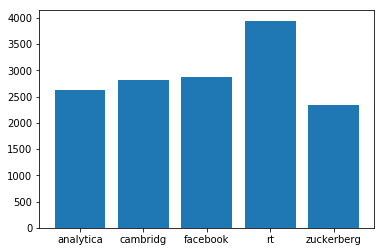

In [59]:
import matplotlib.pyplot as plt
plt.bar(five_most_frequent['index'], five_most_frequent['Frequency'])
plt.show()

In [16]:
tweets_new_1.head()

,index,keyword,date,tweets
0,0,deletefacebook,2018-05-13 07:08:55,rt tomthunkitsmind trumpti polit firm offer en...
1,1,deletefacebook,2018-05-13 07:07:58,rt duckduckgo pleas keep mind deletefacebook d...
2,2,deletefacebook,2018-05-13 07:06:01,rt inthematrixxx qalert 51218peopl unit hold p...
3,3,deletefacebook,2018-05-13 06:38:34,rt tammygallant8 kindamuslim jonathon5760 mdav...
4,7,deletefacebook,2018-05-13 06:21:18,rt spadiva ive start network commun grow pm wa...


In [17]:
tweets_new_1['date'] = [i[0:10] for i in tweets_new_1['date']]

In [18]:
tweets_new_1.head()

,index,keyword,date,tweets
0,0,deletefacebook,2018-05-13,rt tomthunkitsmind trumpti polit firm offer en...
1,1,deletefacebook,2018-05-13,rt duckduckgo pleas keep mind deletefacebook d...
2,2,deletefacebook,2018-05-13,rt inthematrixxx qalert 51218peopl unit hold p...
3,3,deletefacebook,2018-05-13,rt tammygallant8 kindamuslim jonathon5760 mdav...
4,7,deletefacebook,2018-05-13,rt spadiva ive start network commun grow pm wa...


In [19]:
day = tweets_new_1.date.value_counts().to_frame().reset_index()['index'][0]
df = tweets_new_1[tweets_new_1['date']==day]

In [20]:
df.columns

Index(['index', 'keyword', 'date', 'tweets'], dtype='object')

In [21]:
df.tweets.str.split(expand=True).stack().value_counts()

cambridg                   2698
analytica                  2532
rt                         1625
investig                    893
fbi                         745
facebook                    740
data                        736
whistleblow                 600
justic                      568
depart                      468
wyli                        337
us                          334
senat                       307
wa                          303
new                         282
use                         273
thi                         268
christoph                   247
trump                       246
say                         237
via                         219
time                        201
ha                          191
amp                         188
hear                        179
news                        176
zuckerberg                  174
bannon                      163
russia                      159
befor                       158
                           ... 
effi    

In [22]:
tweets_new_1.date.value_counts().shape

(13,)

In [60]:
def cleaned_tweets(file_name):
    """
    Takes in the file name and returns cleaned tweet data with keywords, timestamp and tweets.
    """
    tweets_df = pd.read_csv(file_name)
    df = tweets_df.drop_duplicates(['tweets'])
    return df

In [61]:
def frequency_per_day(df):
    """
    Takes in the cleaned tweets dataframe and returns a dictionary of frequent words per day.
    """
    df['date'] = [i[0:10] for i in df['date']]
    frequency={}
    for i in range(0,df.date.value_counts().shape[0]):
        day = df.date.value_counts().to_frame().reset_index()['index'][i]
        df_day = df[df['date']==day]
        frequency_day = df_day.tweets.str.split(expand=True).stack().value_counts()
        frequency[day]=frequency_day
    return frequency

In [64]:
freq_per_day=frequency_per_day(tweets_new_1)

In [69]:
df = cleaned_tweets('tweets_table-4.csv')

In [27]:
frequency_per_day(df)

{'2018-05-06': cambridg                      11
 twitter                       10
 data                           9
 kogan                          8
 sell                           7
 aleksandr                      6
 analytica                      6
 rt                             5
 facebook                       5
 user                           4
 scandal                        3
 academ                         3
 research                       3
 analyticalink                  3
 scientist                      2
 via                            2
 get                            2
 wa                             2
 access                         2
 never                          1
 r                              1
 hollaka_hollala                1
 charg                          1
 cozier                         1
 lawmak                         1
 top                            1
 holms6                         1
 overse                         1
 jare                           1


In [28]:
df.head()

,keyword,date,tweets
0,deletefacebook,2018-05-13,rt tomthunkitsmind trumpti polit firm offer en...
1,deletefacebook,2018-05-13,rt duckduckgo pleas keep mind deletefacebook d...
2,deletefacebook,2018-05-13,rt inthematrixxx qalert 51218peopl unit hold p...
3,deletefacebook,2018-05-13,rt tammygallant8 kindamuslim jonathon5760 mdav...
7,deletefacebook,2018-05-13,rt spadiva ive start network commun grow pm wa...


In [29]:
df.shape

(11688, 3)

In [30]:
df.keyword.unique()

array(['deletefacebook', '#deletefacebook', 'facebook', 'mark zuckerberg',
       'cambridge analytica', 'aleksandr kogan'], dtype=object)

In [31]:
df['date'] = [i[0:10] for i in df['date']]

In [32]:
df.head()

,keyword,date,tweets
0,deletefacebook,2018-05-13,rt tomthunkitsmind trumpti polit firm offer en...
1,deletefacebook,2018-05-13,rt duckduckgo pleas keep mind deletefacebook d...
2,deletefacebook,2018-05-13,rt inthematrixxx qalert 51218peopl unit hold p...
3,deletefacebook,2018-05-13,rt tammygallant8 kindamuslim jonathon5760 mdav...
7,deletefacebook,2018-05-13,rt spadiva ive start network commun grow pm wa...


In [33]:
keyword_per_day = df.groupby(['date'])['keyword'].unique().to_frame().reset_index()

In [71]:
keyword_per_day

,date,keyword
0,2018-05-06,[aleksandr kogan]
1,2018-05-07,[aleksandr kogan]
2,2018-05-08,[aleksandr kogan]
3,2018-05-09,[aleksandr kogan]
4,2018-05-10,"[deletefacebook, aleksandr kogan]"
5,2018-05-11,"[deletefacebook, aleksandr kogan]"
6,2018-05-12,"[deletefacebook, #deletefacebook, mark zuckerb..."
7,2018-05-13,"[deletefacebook, #deletefacebook, facebook, ma..."
8,2018-05-14,"[mark zuckerberg, #deletefacebook, facebook, a..."
9,2018-05-15,"[#deletefacebook, facebook, mark zuckerberg, c..."


In [90]:
keyword_per_day.mode()

,date,keyword
0,2018-05-06,[aleksandr kogan]
1,2018-05-07,NaN
2,2018-05-08,NaN
3,2018-05-09,NaN
4,2018-05-10,NaN
5,2018-05-11,NaN
6,2018-05-12,NaN
7,2018-05-13,NaN
8,2018-05-14,NaN
9,2018-05-15,NaN


In [75]:
def keyword_frequency_per_day(df):
    """
    Takes in the cleaned tweet dataframe and returns the keyword frequency per day.
    """
    df['date'] = [i[0:10] for i in df['date']]
    keyword_per_day = df.groupby(['date'])['keyword'].unique().to_frame().reset_index()
    return keyword_per_day

In [76]:
keyword_freq=keyword_frequency_per_day(df)
keyword_freq

,date,keyword
0,2018-05-06,[aleksandr kogan]
1,2018-05-07,[aleksandr kogan]
2,2018-05-08,[aleksandr kogan]
3,2018-05-09,[aleksandr kogan]
4,2018-05-10,"[deletefacebook, aleksandr kogan]"
5,2018-05-11,"[deletefacebook, aleksandr kogan]"
6,2018-05-12,"[deletefacebook, #deletefacebook, mark zuckerb..."
7,2018-05-13,"[deletefacebook, #deletefacebook, facebook, ma..."
8,2018-05-14,"[mark zuckerberg, #deletefacebook, facebook, a..."
9,2018-05-15,"[#deletefacebook, facebook, mark zuckerberg, c..."


In [77]:
#Most frequent value:

keyword_freq.keyword.mode()

0    [aleksandr kogan]
dtype: object

In [80]:
#Most frequent value with count:
keyword_freq['keyword'].value_counts()[keyword_freq['keyword'].value_counts() == keyword_freq['keyword'].value_counts().max()]

[aleksandr kogan]    4
Name: keyword, dtype: int64

In [81]:
keyword_freq.describe(include='all')

,date,keyword
count,13,13
unique,13,9
top,2018-05-11,[aleksandr kogan]
freq,1,4


In [82]:
df.describe(include='all')

,keyword,date,tweets
count,11688,11688,11687
unique,6,13,11687
top,cambridge analytica,2018-05-16,rt awf_offici need 60000 peopl tell mark zucke...
freq,3928,4300,1


In [85]:
#Total retweets (tweets that contain the text ' re ')

(df['tweets'].str.contains('rt').sum()/df.shape[0])*100

46.526351813826146